# Anime Data Analysis

Most of you might already be familiar with animes, especially those Japanese ones that are just so addictive. These shows, which are similar to cartoons, have a huge number of viewers and fans. Hundreds of animes are being released each year in all possible genres.

The dataset I'm going to use here was originally scraped from the site www.myanimelist.net, which is an online anime and manga community and database, where viewers can post reviews, rate animes, etc (similar to Goodreads which is for books).

This dataset contains information on user preference data from 73,516 users on 12,294 anime. We're going to use this data and explore what meaningful conclusions we can derive from it.

## Downloading the Dataset

First step is to download the dataset to our notebook. It is in the form of 2 CSV files, published in Kaggle (https://www.kaggle.com/CooperUnion/anime-recommendations-database).

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/CooperUnion/anime-recommendations-database' 

The dataset has been downloaded and extracted.

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: soumyacs
Your Kaggle Key: ········


 36%|███▌      | 9.00M/25.0M [00:00<00:00, 89.2MB/s]

100%|██████████| 25.0M/25.0M [00:00<00:00, 68.5MB/s]


In [4]:
data_dir = './anime-recommendations-database'

In [5]:
import os
os.listdir(data_dir)

['rating.csv', 'anime.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = 'anime-data-analysis'

In [7]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning

Now that we have downloaded the dataset lets move on to tinkering with it. Before that we have to import pandas and convert our CSV files to Dataframes.

In [16]:
import pandas as pd 
import numpy as np

In [9]:

ratings_df = pd.read_csv(data_dir + '/rating.csv')
animes_df = pd.read_csv(data_dir + '/anime.csv')

Lets just start by simply viewing our dataframes.

In [10]:
ratings_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


As you can see, the `ratings_df` has 7,813,737 rows and 3 columns (`user_id`, `anime_id`, `rating`). It gives a list of animes (`anime_id`) that a user (`user_id`) has marked as 'Watched' and the corresponding rating (from 1-10) they've iven it (`rating`).

For example, let's check the no.of animes marked as 'watched' by the user with `user_id = 1`

> For this we are going to take the value_counts() of each user id and sort the user ids in ascending order so that user id 1 comes first.

In [11]:
ratings_df.user_id.value_counts().sort_index(ascending=True)

1        153
2          3
3         94
4         52
5        467
        ... 
73512     13
73513     33
73514      1
73515    196
73516      2
Name: user_id, Length: 73515, dtype: int64

So User ID 1 has watched 153 animes.

Note that in the ratings column there are many -1 values. But our rating system allows only values from 1 to 10. So where did the -1s come from?

This happened beacause not all the users give ratings to all the the animes they watch. Many times, they mark the anime as 'watched' but skip giving it a rating. For these cases, the rating was automatically recorded as -1. But note that this does does not affect the average rating of the show, which is calculated using only the responses of the users who actually gave a rating.

To make it easier, let us replace all the -1s with NaN values instead.

> We're going to use the .replace() function to replace all -1s in `rating` series with np.nan

In [14]:
ratings_df.rating.replace(to_replace=-1, value=np.nan, inplace=True)

# taking sum of all nan 
ratings_df.isna().sum()

user_id           0
anime_id          0
rating      1476496
dtype: int64

In 1,476,496 of the 7,813,737 cases, there is no rating provided. 

**To the 2nd DataFrame**

In [17]:
animes_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


As you can see, here we have more details about the different animes in the site's database. There is a total of 12294 rows, i.e. 12,294 animes. Given the anime id, it provides the name, genre, type (movie, tv, OVA, etc.), no.of episodes (movies have 1 episode), average rating, and no.of members following that anime on the site.

In [18]:
animes_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

This is a list of no.of missing values in each column of our dataframe.

We have to make a note of this to not make too many mistakes moving forward.

In [19]:
import jovian

<IPython.core.display.Javascript object>

In [20]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/soumya-sumswap/anime-data-analysis


<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Plot a histogram to show the no.of animes with a particular range of avg.rating

In [22]:
animes_df.rating.describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

Note that the minimum avrage rating occurence is 1.67 and mean is 6.47.

> We're going to plot a histogram using mathplotlib, plt.hist() function with avg rating as X axis and no.of animes as Y axis.

> The plt.xticks() function allows us to divide the range of numbers to be displayed on the x axis.

> We then specify the x and y axis labels and the title of the graph using .xlabel(), .ylabel() and .title() functions respectively, and display the graph using .show() function.

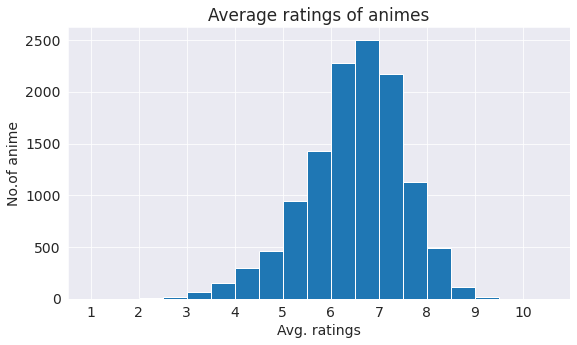

In [23]:
plt.hist(animes_df.rating, bins=np.arange(1,11,0.5))
plt.xticks(np.arange(1,11,1))

plt.xlabel('Avg. ratings')
plt.ylabel('No.of anime')

plt.title('Average ratings of animes')
plt.show()

We can see that most of the animes have an average rating somewhere between 6 to 7.5

All animes will not have great ratings. Most of them will be of average quality bringing the rating down to this range.

#### Create a scatter plot to visualise the relationship between no.of followers and average rating of an anime.

> Plot a scatterplot using seaborn, sns.scatterplot() function with avg rating as X axis and no.of anime members as Y axis.

> The plt.xticks() function allows us to divide the range of numbers to be displayed on the x axis.

> We then specify the x and y axis labels and the title of the graph using .xlabel(), .ylabel() and .title() functions respectively, and display the graph using .show() function.

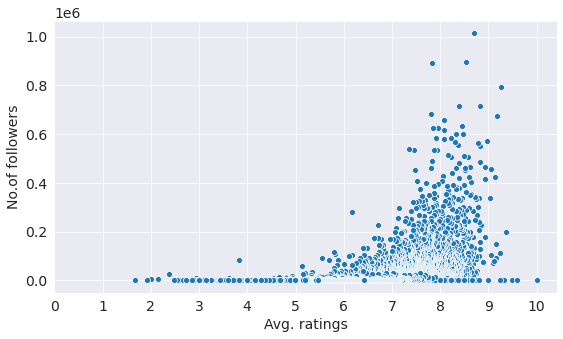

In [24]:
sns.scatterplot(animes_df.rating, animes_df.members)
plt.xticks(np.arange(0,11,1))

plt.xlabel('Avg. ratings')
plt.ylabel('No.of followers')

plt.show()

While most of the animes have an average rating between 6 to 7.5, the animes with the most no.of followers have avg. ratings between 7.5 to 9 (these are the really good animes that become highly popular). So we can safely conclude that the most popular animes tend to have an average rating between 7.5 to 9.

#### Plot a pie-chart on the different types of animes.
Note that we're going to ignore the 25 animes for which `type` is missing.

For more info on the different types of animes, click [here](https://aminoapps.com/c/anime/page/blog/defining-ova-ona-special-episodes-and-movies/bEto_u8PomgzmRaW7MLjQxz5LoZ6VP)

In [25]:
# counting the no.of different types of animes
anime_types = animes_df.type.value_counts()
anime_types

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

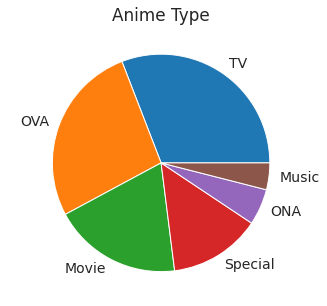

In [27]:
# plotting a pie chart based on this series 
# using mathplotlib, Series.plot.pie() function
anime_types.plot.pie(label = ' ', title = 'Anime Type')
plt.show()

We can see that most of the animes are released as TV shows, followed by OVA (CD - DVD format) which is followed by movies.

#### Plot a line chart to check the relationship between anime type and no.of followers.

> 1. Extract `type` and `members` columns from `animes_df` and copy this a s a new DataFrame (using .copy()) function 
> 2. Use .groupby() function to group no.of memeber of each type of anime and take its mean using the .mean() function.
> 3. We then apply .sort_values() function to display the results in ascending order.
> 4. This is then plotted as a line graph using mathplotlib, plt.plot() function.

In [30]:
type_and_followers_df = animes_df[['type','members']].copy().groupby('type').mean().sort_values(by='members',ascending=True)
type_and_followers_df

,members
type,
Music,1311.840164
ONA,4114.030349
OVA,5986.139837
Special,7676.060859
Movie,10360.340716
TV,42683.658305


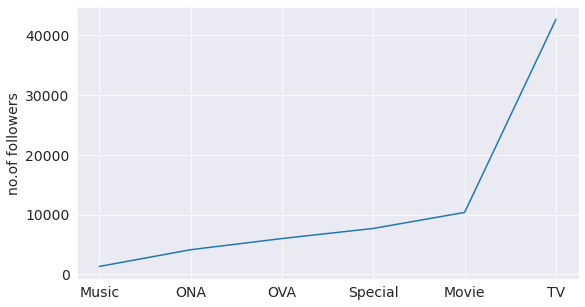

In [31]:
plt.plot(type_and_followers_df)
plt.ylabel('no.of followers')
plt.show()

We can observe that, though most of the animes are released as TV shows and OVAs, in case of no.of followers OVA animes are far behind. TV animes and movies have the highest fanbase. 

This is probably because the animes broadcasted have a far wider reach than those released as DVDs, which usually have a targeted audience. But many animes are still released as OVAs since these have less content-restrictions and censorship, allowing for greater creative freedom.

Let us save and upload our work to Jovian before continuing

In [32]:
import jovian

In [33]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/soumya-sumswap/anime-data-analysis


<IPython.core.display.Javascript object>

## Asking and Answering Question

#### Q1: Find top 10 most watched animes.

Step 1: Find the no.of users who have marked an anime as 'watched'. We're going to extract a new DataFrame from `ratings_df` for this.

In [35]:
# Take value counts of each anime id and 
# declare this as a new dataframe
anime_watch_count = pd.DataFrame(ratings_df.anime_id.value_counts())

# name the column as 'watch_count' using .rename() function
anime_watch_count.rename(columns={'anime_id':'watch_count'},inplace=True)

# sort in descending order of watch count
anime_watch_count.sort_values(by='watch_count', ascending=False, inplace=True)
anime_watch_count

,watch_count
1535,39340
11757,30583
16498,29584
1575,27718
226,27506
...,...
32776,1
13551,1
8218,1
27943,1


Step 2: Extract new DataFrame containing the name and avg. rating corresponding to each anime id from `animes_df`

In [37]:
# Extract and copy dataframe 
# set anime_id column as index using .set_index()
anime_name_and_rating = animes_df[['anime_id','name','rating']].copy().set_index('anime_id')
anime_name_and_rating

,name,rating
anime_id,,
32281,Kimi no Na wa.,9.37
5114,Fullmetal Alchemist: Brotherhood,9.26
28977,Gintama°,9.25
9253,Steins;Gate,9.17
9969,Gintama&#039;,9.16
...,...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami,4.15
5543,Under World,4.28
5621,Violence Gekiga David no Hoshi,4.88


Step 3: Merge the two DataFrames.

In [38]:
# Use .concat() to merge the 2 dataframes based on the index
watch_count_and_rating_df = pd.concat([anime_watch_count,anime_name_and_rating],axis=1,sort=False)
watch_count_and_rating_df

,watch_count,name,rating
1,15509.0,Cowboy Bebop,8.82
5,6927.0,Cowboy Bebop: Tengoku no Tobira,8.40
6,11077.0,Trigun,8.32
7,2629.0,Witch Hunter Robin,7.36
8,413.0,Beet the Vandel Buster,7.06
...,...,...,...
34514,NaN,Pokemon Generations,7.21
34519,1.0,Mobile Suit Gakuen: G-Reco Koushien,5.67
34522,NaN,"Wake Up, Girls! Shin Shou",NaN
34525,NaN,Centaur no Nayami,NaN


Step 4: Drop rows containing missing/NaN values.

In [39]:
#rop NaN and missing values using .dropna()
watch_count_and_rating_df.dropna(inplace=True)

To find the 10 most watched animes, sort the dataframe using `watch_count` in descending order and print the first 10 names using the `.head()` function

In [41]:
watch_count_and_rating_df.sort_values(by='watch_count', ascending=False).head(10)

,watch_count,name,rating
1535,39340.0,Death Note,8.71
11757,30583.0,Sword Art Online,7.83
16498,29584.0,Shingeki no Kyojin,8.54
1575,27718.0,Code Geass: Hangyaku no Lelouch,8.83
226,27506.0,Elfen Lied,7.85
6547,27183.0,Angel Beats!,8.39
20,25925.0,Naruto,7.81
121,25032.0,Fullmetal Alchemist,8.33
5114,24574.0,Fullmetal Alchemist: Brotherhood,9.26
4224,24283.0,Toradora!,8.45


Hence **Death Note** is the most watched anime followed by **Sword Art Online** and **Shingeki no Kyojin**.

#### Q2: Find the top 10 highest rated animes provided they've been watched by atleast 15,000 users.

Drop all rows with `watch_count<15000`

In [42]:
#Drop rows with watch_count<15000 using .drop()
watch_count_and_rating_df.drop(watch_count_and_rating_df[watch_count_and_rating_df.watch_count<15000].index, inplace= True)

Sort based on `rating` and print first 10 animes.

In [43]:
watch_count_and_rating_df.sort_values(by='rating',ascending=False).head(10)

,watch_count,name,rating
5114,24574.0,Fullmetal Alchemist: Brotherhood,9.26
9253,19283.0,Steins;Gate,9.17
4181,17854.0,Clannad: After Story,9.06
2904,24242.0,Code Geass: Hangyaku no Lelouch R2,8.98
199,22974.0,Sen to Chihiro no Kamikakushi,8.93
1575,27718.0,Code Geass: Hangyaku no Lelouch,8.83
1,15509.0,Cowboy Bebop,8.82
164,16303.0,Mononoke Hime,8.81
2001,19337.0,Tengen Toppa Gurren Lagann,8.78
431,17258.0,Howl no Ugoku Shiro,8.74


The highest rated anime with atleast 15000 watches is **Fullmetal Alchemist: Brotherhood** followed by **Steins Gate** and **Clannad:After Story**.

#### Q3: Print the top 10 animes with highest watch value.

Here, I'm going to define watch value as the product of watch count and avg. rating. The shows with highest watch value are those with most no.of watches *and* highest avg. rate.

> 1. Calculate the watch value for each anime. This is done using the `.apply()` function to return a new column containing the product of `watch_count` and `rating`
> 2. Sort based on watch value in descending order and display the top 10 elements using `.head()` function.

In [44]:
new_df = watch_count_and_rating_df.copy()

#Calculate watch value 
new_df['watch_value'] = new_df.apply(lambda row: (row.watch_count*row.rating), 
                                     axis= 1)
#Sort using watch value in descending order 
#and print top 10 animes
new_df.sort_values(by='watch_value', ascending=False).head(10)

,watch_count,name,rating,watch_value
1535,39340.0,Death Note,8.71,342651.40
16498,29584.0,Shingeki no Kyojin,8.54,252647.36
1575,27718.0,Code Geass: Hangyaku no Lelouch,8.83,244749.94
11757,30583.0,Sword Art Online,7.83,239464.89
6547,27183.0,Angel Beats!,8.39,228065.37
5114,24574.0,Fullmetal Alchemist: Brotherhood,9.26,227555.24
2904,24242.0,Code Geass: Hangyaku no Lelouch R2,8.98,217693.16
226,27506.0,Elfen Lied,7.85,215922.10
121,25032.0,Fullmetal Alchemist,8.33,208516.56
4224,24283.0,Toradora!,8.45,205191.35


The anime with highest watch value is **Death Note** (which also came out as the most popular anime), followed by **Shingeki no Kyojin** and **Code Geass**.

#### Q4: Find the top 10 most common anime genres

> 1. Extract the series `genre` from `animes_df` and remove all NaN values using .dropna()
> 2. Define a function `Convert` to convert the string type elements of `genres` series to lists conatining the various genres each anime belongs to. Use `.apply()` to apply the function to all elements of the series.
> 3. Use `.tolist()` function to convert the series to a single multi-dimensional array.
> 4. Use `numpy.concatenate()` to change this to a 1D array convert it to a series usind `pandas.Series()` function.
> 5. Now use `.value_counts()` to calculate the no.of times each genre appears. Sort values in descending order and display the 1st 10 elements

In [45]:
def Convert(string):
    string = string.replace(" ","")
    li = list(string.split(","))
    return li

genres = animes_df.genre.copy() # creating a copy of the series
genres.dropna(inplace=True) # dropping missing values

#converting string elements to list using Convert function
genres = genres.apply(Convert).tolist()

#Converting multi-dimensional list to 1D numpy array
genres = np.concatenate(genres)

#Converty numpy array to pandas series
genres = pd.Series(genres)

#applying value_counts, sorting in ascending order and displaying top 10
genres = genres.value_counts().sort_values(ascending=False).head(10)
genres

Comedy       4645
Action       2845
Adventure    2348
Fantasy      2309
Sci-Fi       2070
Drama        2016
Shounen      1712
Kids         1609
Romance      1464
School       1220
dtype: int64

Hence, the top anime genre is (understandably) **Comedy**, follwed by **Action**, **Adventure**, and **Fantasy**

Let us save and upload our work to Jovian before continuing.

In [46]:
import jovian

In [47]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/soumya-sumswap/anime-data-analysis


<IPython.core.display.Javascript object>

## Inferences and Conclusion

A summary of our inferences:
1. Most of the animes have an average rating between 6 to 7.5 stars.
2. The animes having average rating between 7.5 to 9 have the highest no.of followers.
3. Most of the animes are released as TV shows followed by OVA, and movies.
4. But TV shows and movies have the biggest fanbase, while OVA falls behind.

5. 'Death Note' is the most watched anime followed by 'Sword Art Online' and ' Shingeki no Kyojin'.
6. The highest rated anime with atleast 15000 watches is 'Fullmetal Alchemist: Brotherhood' followed by 'Steins Gate' and 'Clannad:After Story'.
7. The anime with highest watch value is 'Death Note' (which also came out as the most popular anime), followed by 'Shingeki no Kyojin' and 'Code Geass'.
8. The top anime genre is Comedy, follwed by Action, Adventure and Fantasy

In [59]:
import jovian

In [60]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/soumya-sumswap/anime-data-analysis


<IPython.core.display.Javascript object>

## References

Data Analysis with Python: Zero to Pandas (https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas)

In [61]:
import jovian

In [63]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/soumya-sumswap/anime-data-analysis


<IPython.core.display.Javascript object>